Assignment 8
==========================
Use the “Auto MPG” dataset in the UC Irvine data repository:
https://archive.ics.uci.edu/ml/datasets/Auto+MPG

**Importing the data**

In [65]:
#import statements
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

#1. Load the data in the Data Folder into a pandas DataFrame
#3. Use the attribute information provided in auto-mpg.names to name your pandas DataFrame columns
autos = pd.read_fwf('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
                    header=None, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name'])
#2. Review the data and the provided data set description
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


**Data Clean Up**

In [72]:
#4. Replace '?' with pandas-appropriate missing value, we will NaN
autos.replace('?', np.nan, inplace=True)
#4. Convert the column to numeric
autos['horsepower'] = autos['horsepower'].astype(float)
autos.dtypes
#5. Convert the origin colums values from 1, 2, and 3 to USA, Asia and Europe
autos['origin'].replace([1,2,3], ['USA', 'Asia', 'Europe'], inplace=True)
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,"""ford torino"""


**Charts**
#6 Bar Chart that shows the distribution of cylinders

<AxesSubplot:xlabel='cylinders'>

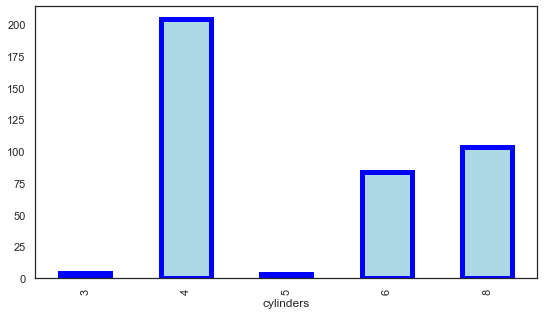

In [67]:
cylindergroup = autos.groupby('cylinders')
cylindergroup['cylinders'].count().plot.bar(color='lightblue', edgecolor='blue', figsize=(9, 5), linewidth=5)

#7 Scatterplot that shows the relationship between horsepower and weight

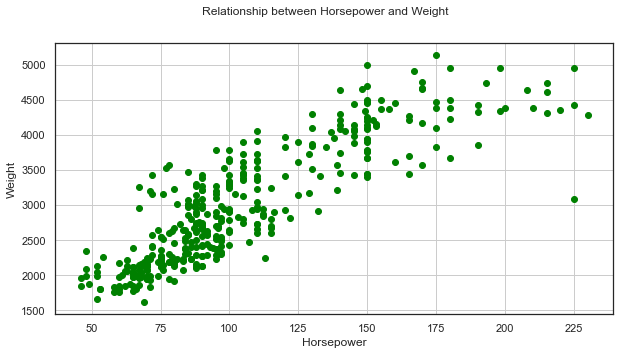

In [68]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(autos['horsepower'], autos['weight'], color='green')
ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
fig.suptitle('Relationship between Horsepower and Weight')
ax.grid(True)

#8 Ask and answer with matplotlib and seaborn graphics an interesting question about the distribution of one of the variables
Or the relationship between two variables

Question: What is the relation between the weight of the car and the MPG of a car?
Answer: As the cars weight increases the MPG decreases. This is true as the heavier the car is the more enegery that is required.

In [69]:
autos

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA,"""ford mustang gl"""
394,44.0,4,97.0,52.0,2130.0,24.6,82,Asia,"""vw pickup"""
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA,"""dodge rampage"""
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA,"""ford ranger"""


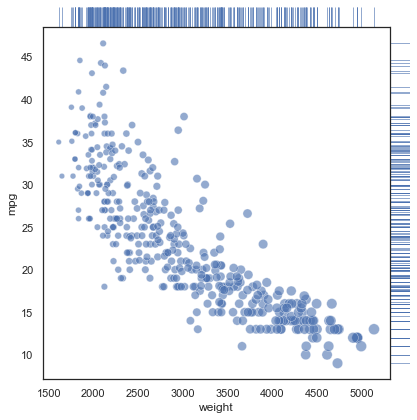

In [70]:
sns.set_theme(style="white", color_codes=True)

# Use JointGrid directly to draw a custom plot
g = sns.JointGrid(data=autos, x="weight", y="mpg", space=0, ratio=17)
g.plot_joint(sns.scatterplot, size=autos["weight"], sizes=(30, 120),
             color="b", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="b", alpha=.6)